In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import preprocessing
import category_encoders as ce

from sklearn import model_selection
from sklearn import metrics

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

from sklearn import mixture

In [2]:
X_train = np.loadtxt('data/samsung/train.txt')
X_test = np.loadtxt('data/samsung/test.txt')

y_train = np.loadtxt('data/samsung/train_labels.txt')
y_test = np.loadtxt('data/samsung/test_labels.txt')

In [3]:
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

In [4]:
scaler = preprocessing.StandardScaler()

X_norm = scaler.fit_transform(X)

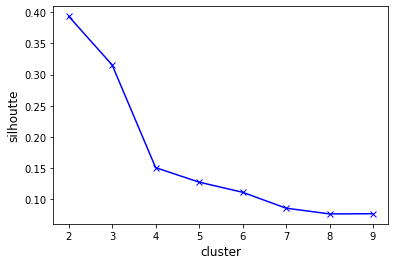

In [5]:
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = metrics.silhouette_score(X, k_means.labels_)
    return silhouette


silhouette = []
for clust_num in range(2, 10):
    silhouette.append(get_silhouette(clust_num, X_norm))

plt.xlabel("cluster", fontsize=12)
plt.ylabel("silhoutte", fontsize=12)
plt.plot([i for i in range(2, 10)], silhouette, '-xb')


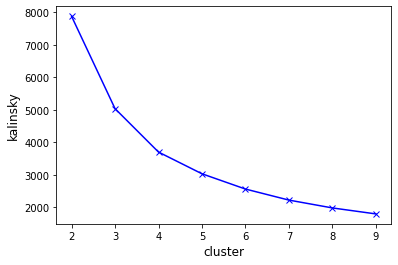

In [6]:
def get_kalinsky(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    kalinsky = metrics.calinski_harabasz_score(X, k_means.labels_)
    return kalinsky


kalinsky = []
for clust_num in range(2, 10):
    kalinsky.append(get_kalinsky(clust_num, X_norm))

plt.xlabel("cluster", fontsize=12)
plt.ylabel("kalinsky", fontsize=12)
plt.plot([i for i in range(2, 10)], kalinsky, '-xb')

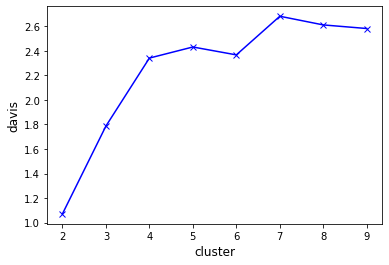

In [7]:
def get_davis(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    davis = metrics.davies_bouldin_score(X, k_means.labels_)
    return davis


davis = []
for clust_num in range(2, 10):
    davis.append(get_davis(clust_num, X_norm))

plt.xlabel("cluster", fontsize=12)
plt.ylabel("davis", fontsize=12)
plt.plot([i for i in range(2, 10)], davis, '-xb')

In [8]:
k_means = KMeans(n_clusters=6, random_state=42)
k_means.fit(X_norm)

print(f'Однородность: {metrics.homogeneity_score(y, k_means.labels_)}')
print(f'Полнота: {metrics.completeness_score(y, k_means.labels_)}')
print(f'Скорректированный Рэнд: {metrics.adjusted_rand_score(y, k_means.labels_)}')

Однородность: 0.5404263978615286
Полнота: 0.5807797117737106
Скорректированный Рэнд: 0.419224271062724


In [9]:
#создаём таблицу сопряжённости
ct = pd.crosstab(y, k_means.labels_)
#определяем название активностей
ct.index = ['ходьба', 'подъём', 
             'спуск', 'сидение', 'стояние', 'лежание']
ct.columns = list(range(1,7))

In [10]:
ct

,1,2,3,4,5,6
ходьба,0,903,0,742,77,0
подъём,2,1242,0,295,5,0
спуск,0,321,0,889,196,0
сидение,451,1,91,0,0,1234
стояние,566,0,0,0,0,1340
лежание,330,5,1556,0,0,53


In [11]:
k_means = KMeans(n_clusters=2, random_state=42)
k_means.fit(X_norm)

print(f'Однородность: {metrics.homogeneity_score(y, k_means.labels_)}')
print(f'Полнота: {metrics.completeness_score(y, k_means.labels_)}')
print(f'Скорректированный Рэнд: {metrics.adjusted_rand_score(y, k_means.labels_)}')

Однородность: 0.3779708224689608
Полнота: 0.979530559699631
Скорректированный Рэнд: 0.3296106738894193


In [12]:
#создаём таблицу сопряжённости
ct = pd.crosstab(y, k_means.labels_)
#определяем название активностей
ct.index = ['ходьба', 'подъём', 
             'спуск', 'сидение', 'стояние', 'лежание']
ct.columns = list(range(1,3))

In [13]:
ct

,1,2
ходьба,1722,0
подъём,1536,8
спуск,1406,0
сидение,3,1774
стояние,0,1906
лежание,12,1932


In [14]:
ag = AgglomerativeClustering(n_clusters=2)
ag.fit(X_norm)

print(f'Однородность: {metrics.homogeneity_score(y, ag.labels_)}')
print(f'Полнота: {metrics.completeness_score(y, ag.labels_)}')
print(f'Скорректированный Рэнд: {metrics.adjusted_rand_score(y, ag.labels_)}')

Однородность: 0.38579907418430925
Полнота: 0.9999999999999993
Скорректированный Рэнд: 0.33253220715485143


Понижение размерности

In [15]:
data = pd.read_csv('data/Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [16]:
data.life_expec.max()

82.8

In [18]:
scaler = preprocessing.StandardScaler()

data_norm = scaler.fit_transform(data.drop(['country'], axis=1))
data_norm[0][0]

1.2915323778422956

In [21]:
data_norm = pd.DataFrame(data=data_norm, columns=data.drop(['country'], axis=1).columns)

In [23]:
data_norm.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


In [24]:
from sklearn.decomposition import PCA

In [39]:
pca = PCA(n_components=0.9, random_state=42)
pca.fit(data_norm)

print(len(pca.components_))

5


In [40]:
pca.explained_variance_ratio_[0]

0.45951739786095924

<AxesSubplot:>

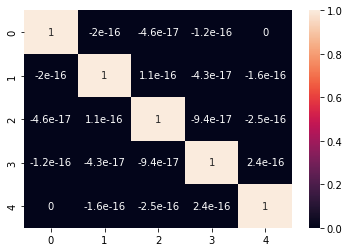

In [41]:
pca_data = pca.fit_transform(data_norm)
corrmat = np.corrcoef(pca_data.transpose())
sns.heatmap(corrmat, annot=True)

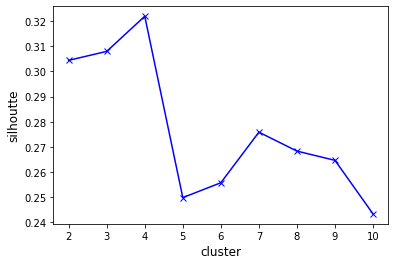

In [44]:
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, random_state=1)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = metrics.silhouette_score(X, k_means.labels_)
    return silhouette


silhouette = []
for clust_num in range(2, 11):
    silhouette.append(get_silhouette(clust_num, pca_data))

plt.xlabel("cluster", fontsize=12)
plt.ylabel("silhoutte", fontsize=12)
plt.plot([i for i in range(2, 11)], silhouette, '-xb')

In [45]:
k_means = KMeans(n_clusters=4, random_state=1)
k_means.fit(pca_data)

data['labels'] = k_means.labels_

In [46]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


In [51]:
grouped = data.groupby(['labels'])['child_mort'].mean()

In [52]:
grouped

labels
0    21.690588
1    92.961702
2     4.133333
3     5.181250
Name: child_mort, dtype: float64

In [56]:
data[data['labels']==1][['country', 'life_expec']].sort_values(by='life_expec')

,country,life_expec
66,Haiti,32.1
87,Lesotho,46.5
31,Central African Republic,47.5
166,Zambia,52.0
94,Malawi,53.1
137,South Africa,54.3
106,Mozambique,54.5
132,Sierra Leone,55.0
64,Guinea-Bissau,55.6
0,Afghanistan,56.2
